*** Mean + Standard Deviation ***
1. Take the mean of the data points
2. Add/substract a desired number of standard deviation from the mean, and find any data falling outside of this range to consider as a outlier

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Create a sample data
# rng=np.random.RandomState(42)

x_len=20
const=np.full((1,x_len),10)
noise=np.random.randint(1,3,x_len)
data=const+noise


In [3]:
# Calculate mean and standard deviation
avg=np.mean(data)
std=np.std(data)
alpha=3
upper=avg+(alpha*std)
lower=avg-(alpha*std)

print(upper)
print(lower)

12.780908802125419
9.91909119787458


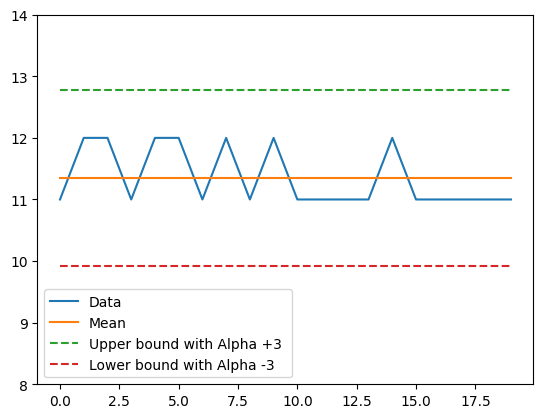

In [4]:
# Plot the data
plt.plot(range(0,x_len), data.tolist()[0], label="Data")
plt.plot(range(0,x_len),[avg]*x_len, label="Mean")
plt.plot(range(0,x_len),[upper]*x_len, label="Upper bound with Alpha +3 ", linestyle='--')
plt.plot(range(0,x_len),[lower]*x_len, label="Lower bound with Alpha -3 ", linestyle='--')
plt.ylim(8,14)
plt.legend()
plt.show()

In [5]:
# Create a sample data with huge outlier
x_len=21
const=np.full((1,x_len-1),10)
noise=np.random.randint(1,3,x_len-1)
data=const+noise

In [6]:
# Calculate the mean and std
avg=np.mean(data)
std=np.std(data)
alpha=3
upper=avg+(alpha*std)
lower=avg-(alpha*std)

print(lower)
print(upper)

10.130306154330093
13.069693845669907


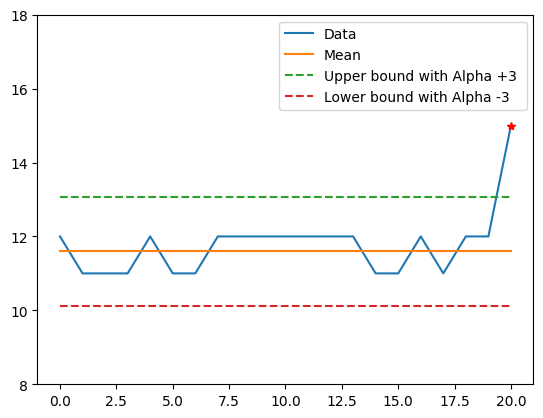

In [7]:
# Plot the data
data_list=data.tolist()[0]
new_data=15
data_list.append(new_data)
plt.plot(range(0,x_len), data_list, label="Data")
plt.plot(range(0,x_len),[avg]*x_len, label="Mean")
plt.plot(range(0,x_len),[upper]*x_len, label="Upper bound with Alpha +3 ", linestyle='--')
plt.plot(range(0,x_len),[lower]*x_len, label="Lower bound with Alpha -3 ", linestyle='--')
plt.ylim(8,18)
# Check if new data point falls inside thresholds
# flag with red star if new data is outside threshold
if new_data>upper:
    plt.plot(20,new_data,marker="*", color="red")
elif new_data<lower:
    plt.plot(20,new_data,marker="*", color="red")
else:#
    plt.plot(20,new_data)
plt.legend()    
plt.show()

# As we can see the red star on the graph. If condition returns True, an alert or notification can be sent to the respective interested team.

*** 2. Time Series Decomposition ***
1. If the data appears to be batch or seasonality
2. Can be formatted as a time series powerful technique


In [11]:
!pip install statsmodels

# from statsmodels.tsa.seasonal import seasonal_decompose

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://artifacts.i.mercedes-benz.com/artifactory/api/pypi/pypi-opensource-remote/simple



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
np.random.seed(0)
date_rng=pd.date_range(start="2025-01-01", periods=365, freq="D")
data=np.sin(np.arange(365)*2*np.pi/365)+np.random.normal(0,0.5,365)
ts=pd.Series(data,index=date_rng)
ts

2025-01-01    0.882026
2025-01-02    0.217292
2025-01-03    0.523791
2025-01-04    1.172066
2025-01-05    1.002581
                ...   
2025-12-27    0.263264
2025-12-28   -0.066917
2025-12-29    0.414305
2025-12-30    0.135561
2025-12-31   -0.025054
Freq: D, Length: 365, dtype: float64

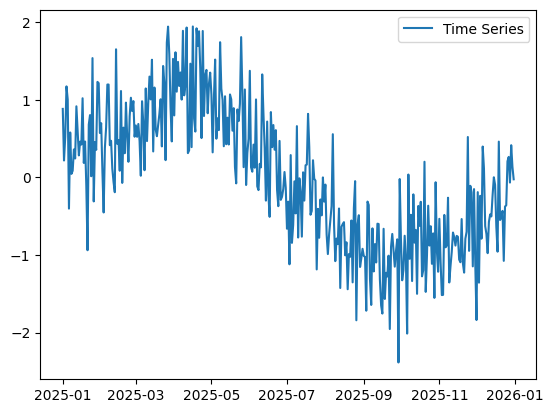

In [11]:
plt.plot(ts,label="Time Series")
plt.legend()

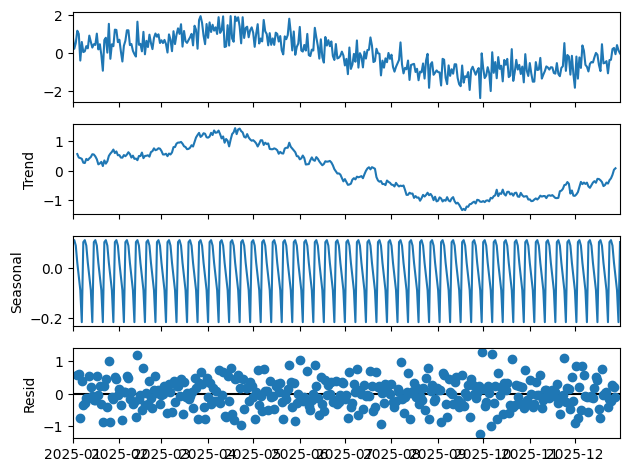

In [12]:
result_add=seasonal_decompose(ts,model='additive') # With the help of additive model the 4 data figure is plotted 
result_add.plot()
plt.show()

# The components of the plot figure
# 1. Original time series
# 2. Trend of the data  -Long term direction
# 3. Seasonality pattern found -repeating pattern
# 4. Residuals, or teh difference between the trend+seasonality and the original data  -Leftover random noise

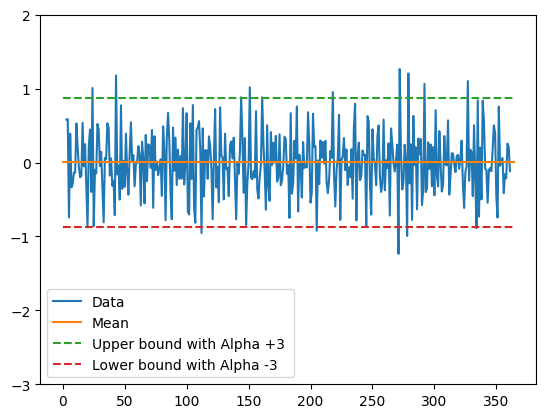

In [13]:
# Apply the Mean and Std technique on time series dataset
data=result_add.resid
data_len=len(data)
avg=np.mean(data)
std=np.std(data)
alpha=2
upper=avg+(alpha*std)
lower=avg-(alpha*std)


data_list=data.tolist()
# df=pd.DataFrame(data_list)
# display(df)
# new_data=15
# data_list.append(new_data)
plt.plot(range(0,data_len), data_list, label="Data")
plt.plot(range(0,data_len),[avg]*data_len, label="Mean")
plt.plot(range(0,data_len),[upper]*data_len, label="Upper bound with Alpha +3 ", linestyle='--')
plt.plot(range(0,data_len),[lower]*data_len, label="Lower bound with Alpha -3 ", linestyle='--')
plt.ylim(-3,2)
# Check if new data point falls inside thresholds
# flag with red star if new data is outside threshold
# if new_data>upper:
#     plt.plot(20,new_data,marker="*", color="red")
# elif new_data<lower:
#     plt.plot(20,new_data,marker="*", color="red")
# else:#
#     plt.plot(20,new_data)
plt.legend()    
plt.show()

*** Regression Residual ***
1. Using the same technique of threshold value.
2. Predict the value and cross-check against the actual data.
3. if the difference between the model and observed data differ by more than the thresholf , then classify the data as a outlier


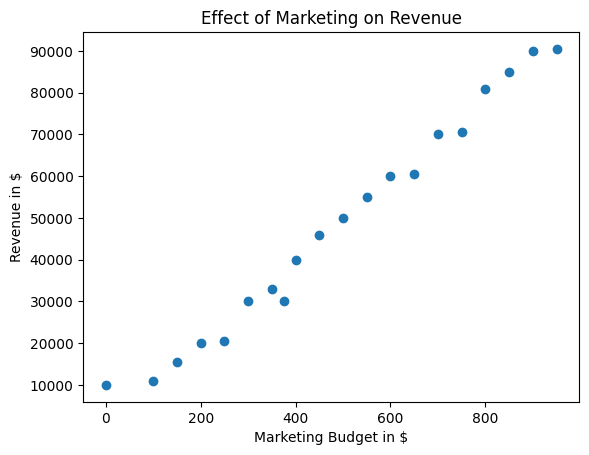

In [14]:
# np.random.seed(0)

# data=np.random.normal()

marketing_dollars = [0, 100, 150, 200, 250, 300, 350, 375, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]
revenue_dollars = [10000, 11000, 15500, 20002, 20500, 30000, 33000, 30005, 40001, 45855, 50005, 55000, 60000, 60500, 70007, 70500, 80800, 85005, 90000, 90500]

plt.scatter(marketing_dollars, revenue_dollars)
plt.title('Effect of Marketing on Revenue')
plt.ylabel('Revenue in $')
plt.xlabel('Marketing Budget in $')
plt.show()

In [15]:
# Import Scikit-Learn to allow us to run Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
#Scikit learn needs the data in a specific shape so we use NumPy to change the way the data is formatted
marketing_dollars = np.array(marketing_dollars)
revenue_dollars = np.array(revenue_dollars)
marketing_dollars = marketing_dollars.reshape(-1, 1)
revenue_dollars = revenue_dollars.reshape(-1, 1)

In [17]:
fitted_model = model.fit(marketing_dollars, revenue_dollars)

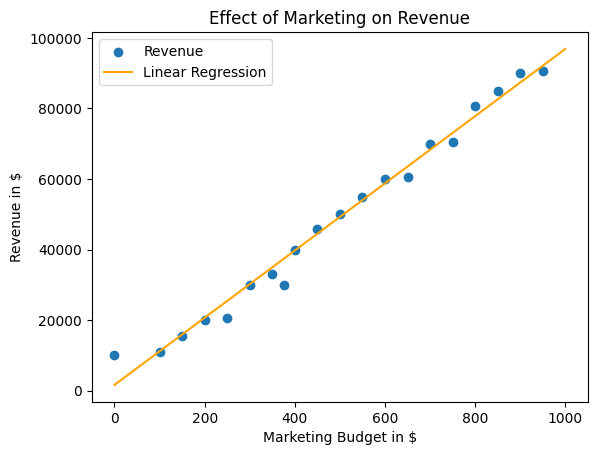

In [18]:
predict_X = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
fitted_line = fitted_model.predict(np.array(predict_X).reshape(-1, 1))
plt.scatter(marketing_dollars, revenue_dollars)
plt.plot(predict_X, fitted_line, color="orange")
plt.title('Effect of Marketing on Revenue')
plt.ylabel('Revenue in $')
plt.xlabel('Marketing Budget in $')
plt.legend(['Revenue', 'Linear Regression'])
plt.show()

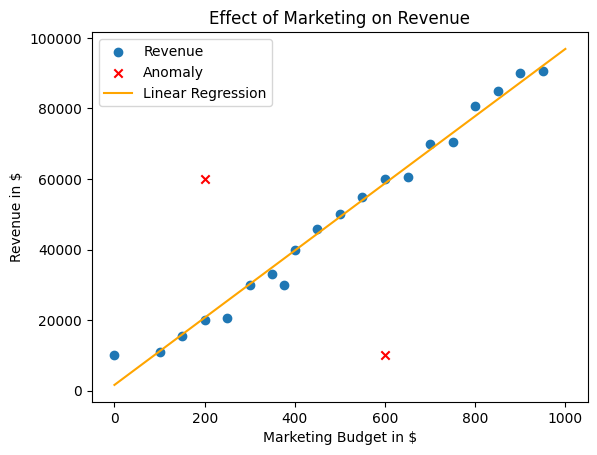

In [19]:
plt.scatter(marketing_dollars, revenue_dollars)
plt.scatter([200, 600], [60000, 10000], color="red", marker="x")
plt.plot(predict_X, fitted_line, color="orange")
plt.title('Effect of Marketing on Revenue')
plt.ylabel('Revenue in $')
plt.xlabel('Marketing Budget in $')
plt.legend(['Revenue', 'Anomaly', 'Linear Regression'])
plt.show()

***Binary Classification***


In [20]:
marketing_dollars = [0, 100, 150, 200, 250, 300, 350, 375, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]
revenue_dollars = [10000, 11000, 15500, 60000, 20500, 30000, 33000, 30005, 40001, 45855, 9000, 55000, 60000, 60500, 70007, 20000, 80800, 85005, 90000, 90500]

X = np.column_stack([marketing_dollars, revenue_dollars])
# labels stating whether the data was anomalous or not
# 1 refers to an anomaly
anomaly = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])
y = anomaly.reshape(len(anomaly), )

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
fitted_model = model.fit(X, y)

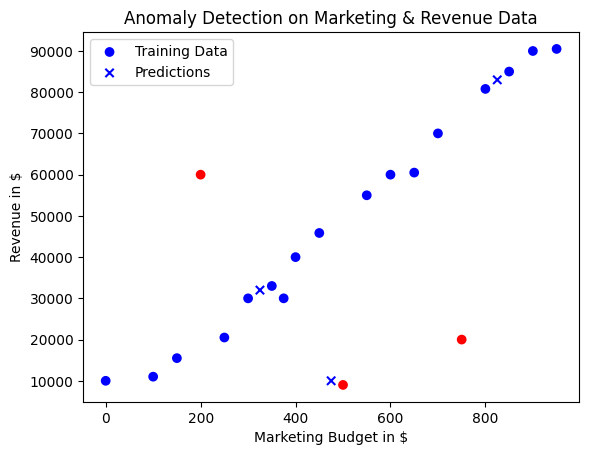

In [22]:
test_marketing = [325, 475, 825]
test_revenue = [32000, 10000, 83000]
test_X = np.column_stack([test_marketing, test_revenue])
predictions = fitted_model.predict(test_X)
plt.scatter(marketing_dollars, revenue_dollars, c=anomaly, cmap='bwr')
plt.scatter(test_marketing, test_revenue, c=predictions, cmap='bwr', marker="x")
plt.title('Anomaly Detection on Marketing & Revenue Data')
plt.ylabel('Revenue in $')
plt.xlabel('Marketing Budget in $')
plt.legend(['Training Data', 'Predictions'])
plt.show()